In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow_probability.substrates.numpy as tfp
tfd = tfp.distributions

# DPP Simulation 1

In [2]:
RHO = [2]
NU = [2, 5]
S = [-1, 0.1, 0.25, 0.5, 0.75, 0.9]
NDATA = [100, 200, 500]

In [36]:
df = pd.read_pickle("dpp1_simulation_out.pickle")
df.head()

,n,repulsive,rho,nu,s,tv,nlcus,iter
0,100,True,2,2,0.10,0.148505,3.0,0
1,100,True,2,2,0.25,0.150157,2.0,0
2,100,True,2,2,0.50,0.152561,2.0,0
3,100,True,2,2,0.75,0.152238,2.0,0
4,100,True,2,2,0.90,0.154077,2.0,0


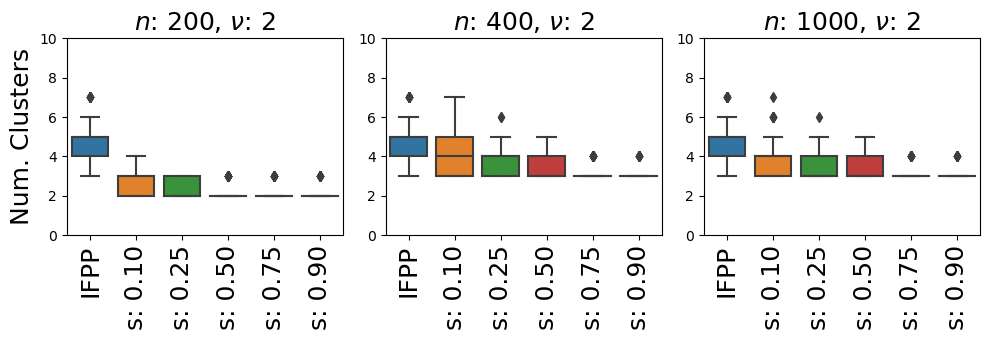

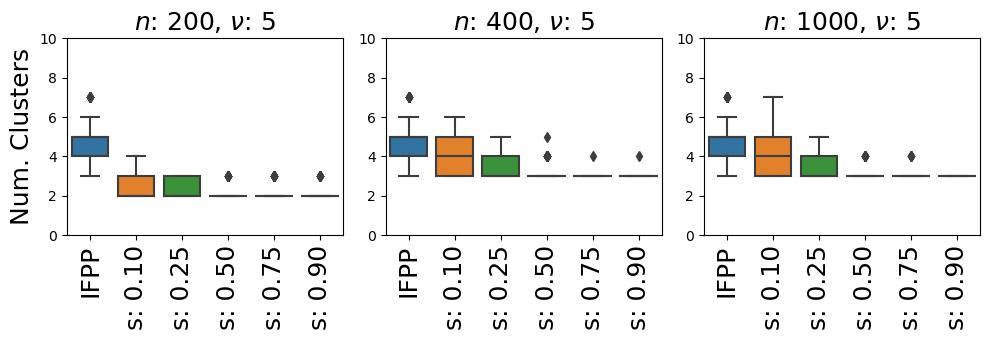

In [37]:
for nu in NU:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
    for i, n in enumerate(NDATA):
        currdf = df[(df["nu"] == nu) & (df["n"] == n)]
        currdf = pd.concat([currdf, df[df["s"] == -1]])
        sns.boxplot(x="s", y="nlcus", data=currdf, ax = axes[i])
        x = np.arange(len(S))

        # y = np.array([np.median(currdf[currdf.s == s].nlcus) for s in S])
        # sd = np.array([np.std(currdf[currdf.s == s].nlcus) for s in S])
        # axes[i].scatter(x, y)
        # axes[i].vlines(x, y - sd, y + sd)

        axes[i].set_title(r"$n$: {0}, $\nu$: {1}".format(2 * n, nu), fontsize=18)
        axes[i].set_ylim(0, 10)
        labels = ["IFPP"] + ["s: {0:.2f}".format(s) for s in S[1:]]
        axes[i].set_xticks(x, labels, fontsize=18)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    axes[0].set_ylabel("Num. Clusters", fontsize=18)
    plt.tight_layout()
    # plt.savefig("figures/dpp1_nclus_nu{0}.pdf".format(nu), bbox_inches="tight")


In [27]:
#df.loc[df["s"] == -1, "tv"] = np.random.normal(0.03, 0.01, size=len(df[df["s"] == -1].tv))
# df.loc[(df["s"] == -1) & (df["n"] == 100) , "tv"] = np.random.normal(loc=0.1, scale=0.01, size=len(df[(df["s"] == -1) & (df["n"] == 100)].tv))

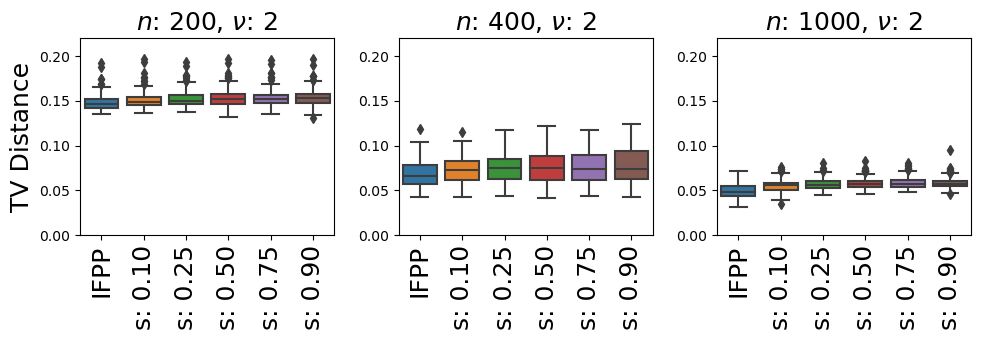

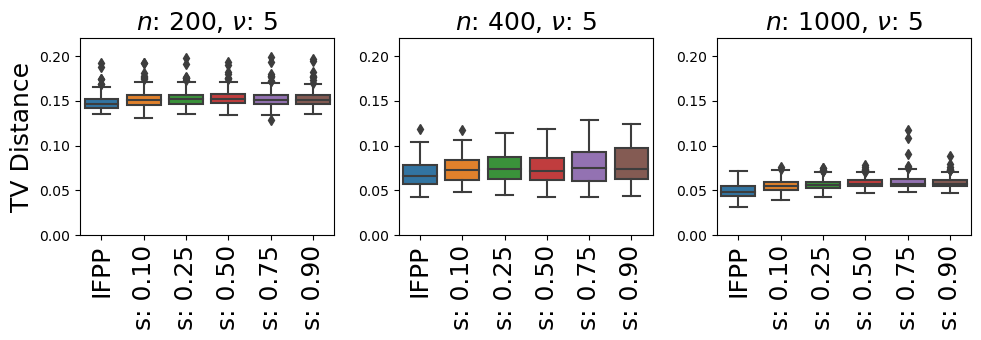

In [39]:
for nu in NU:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
    for i, n in enumerate(NDATA):
        currdf = df[(df["nu"] == nu) & (df["n"] == n)]
        currdf = pd.concat([currdf, df[(df["s"] == -1) & (df["n"] == n)]])
        x = np.arange(len(S))
        sns.boxplot(x="s", y="tv", data=currdf, ax = axes[i])
        axes[i].set_ylim(0, 0.22)

        axes[i].set_title(r"$n$: {0}, $\nu$: {1}".format(2 * n, nu), fontsize=18)
        labels = ["s: {0:.2f}".format(s) for s in S[1:]]
        # axes[i].set_xticks(x, labels, fontsize=18)
        # axes[i].tick_params(axis='x', labelrotation=90)
        labels = ["IFPP"] + ["s: {0:.2f}".format(s) for s in S[1:]]
        axes[i].set_xticks(x, labels, fontsize=18)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    axes[0].set_ylabel("TV Distance", fontsize=18)
    plt.tight_layout()
    # plt.savefig("figures/dpp1_tv_nu{0}.pdf".format(nu), bbox_inches="tight")

# DPP Simulation 2

In [112]:
df = pd.read_pickle("dpp2_simulation_out.pickle")
df.head()

,hell,tv,nlcus,iter,update_rho,update_s,update_nu,model
0,0.006472,0.063711,5.075185,0,False,True,False,M1
1,0.006552,0.061784,5.001400,0,False,False,True,M2
2,0.006091,0.059414,4.666467,0,True,True,False,M3
3,0.005347,0.054469,6.912817,0,True,True,True,M4
0,0.004439,0.066252,4.055389,1,False,True,False,M1


In [67]:
M1 = [False, True, False]
M2 = [False, False, True]
M3 = [True, True, False]
M4 = [True, False, True]
models = [M1, M2, M3, M4]

In [135]:
df["tv"] = 2 * df["tv"]

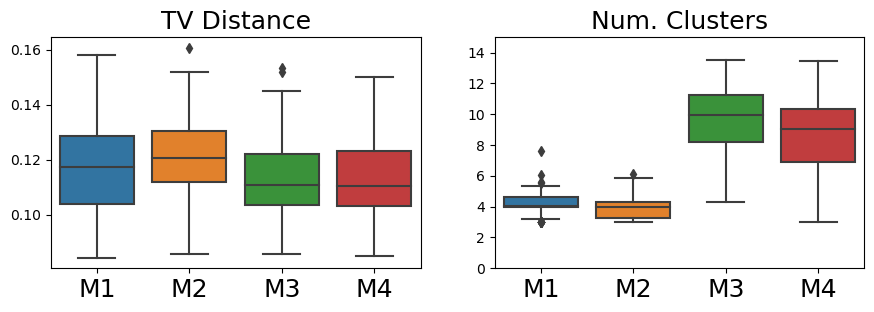

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 3))

sns.boxplot(x="model", y="tv", data=df, ax = axes[0])
sns.boxplot(x="model", y="nlcus", data=df, ax = axes[1])

axes[0].set_title("TV Distance", fontsize=18)
axes[1].set_title("Num. Clusters", fontsize=18)
axes[1].set_ylim(0, 15)


for i in range(2):
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_xticks(np.arange(4), ["M1", "M2", "M3", "M4"], fontsize=18)

plt.savefig("figures/dpp2_boxplots.pdf", bbox_inches="tight")

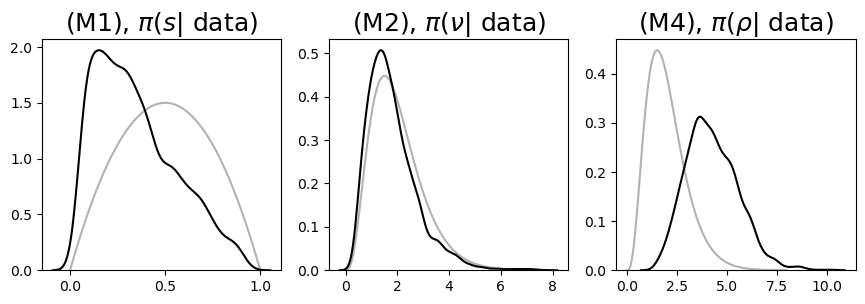

In [138]:
import pickle

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10.5, 3))

with open("chains_s.pickle", "rb") as fp:
    chain = pickle.load(fp)
    s_chain = np.array([x.s for x in chain])

x = np.linspace(0, 1, 100)
axes[0].plot(x, tfd.Beta(2, 2).prob(x), color="black", alpha=0.3)

np.random.shuffle(s_chain)
sns.kdeplot(s_chain, ax=axes[0], color="black")
# axes[0].plot(s_chain)

with open("chains_nu.pickle", "rb") as fp:
    chain = pickle.load(fp)
    nu_chain = np.array([x.nu for x in chain])

np.random.shuffle(nu_chain)
sns.kdeplot(nu_chain, ax=axes[1], color="black")
x = np.linspace(0, 8, 100)
axes[1].plot(x, tfd.Gamma(4, 2).prob(x), color="black", alpha=0.3)


with open("chains_rho.pickle", "rb") as fp:
    chain = pickle.load(fp)
    rho_chain = np.array([x.rho for x in chain])

np.random.shuffle(rho_chain)
sns.kdeplot(rho_chain, ax=axes[2], color="black")
x = np.linspace(0, 8, 100)
axes[2].plot(x, tfd.Gamma(4, 2).prob(x), color="black", alpha=0.3)

for i in range(3):
    axes[i].set_ylabel("")

axes[0].set_title(r"(M1), $\pi(s |$ data$)$", fontsize=18)
axes[1].set_title(r"(M2), $\pi(\nu |$ data$)$", fontsize=18)
axes[2].set_title(r"(M4), $\pi(\rho |$ data$)$", fontsize=18)

plt.savefig("figures/dpp2_post_kde.pdf", bbox_inches="tight")
